# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [66]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [67]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [68]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | viedma
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | saipan
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | pundong
Processing Record 6 of Set 1 | longquan
Processing Record 7 of Set 1 | anadyr
Processing Record 8 of Set 1 | west island
Processing Record 9 of Set 1 | edinburgh of the seven seas
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | dunedin
Processing Record 12 of Set 1 | nova sintra
Processing Record 13 of Set 1 | tiksi
Processing Record 14 of Set 1 | bismarck
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | anna regina
Processing Record 18 of Set 1 | xilin hot
Processing Record 19 of Set 1 | pathein
Processing Record 20 of Set 1 | aral
Processing Record 21 of Set 1 | grytviken
Processing Record 22 of Set 1 | igurubi
Processing Record

Processing Record 42 of Set 4 | el tigre
Processing Record 43 of Set 4 | flying fish cove
Processing Record 44 of Set 4 | selkirk
Processing Record 45 of Set 4 | cascais
Processing Record 46 of Set 4 | cargados carajos
City not found. Skipping...
Processing Record 47 of Set 4 | esikhaleni
Processing Record 48 of Set 4 | atafu village
Processing Record 49 of Set 4 | beterou
Processing Record 0 of Set 5 | kataragama
City not found. Skipping...
Processing Record 1 of Set 5 | acapulco de juarez
Processing Record 2 of Set 5 | farsan
Processing Record 3 of Set 5 | rio grande
Processing Record 4 of Set 5 | puerto lempira
Processing Record 5 of Set 5 | yaren
Processing Record 6 of Set 5 | tralee
Processing Record 7 of Set 5 | tranovaho
City not found. Skipping...
Processing Record 8 of Set 5 | charters towers
Processing Record 9 of Set 5 | kinmparana
Processing Record 10 of Set 5 | nuevo laredo
Processing Record 11 of Set 5 | utrik
Processing Record 12 of Set 5 | novyy turtkul'
Processing Reco

Processing Record 30 of Set 8 | magadan
Processing Record 31 of Set 8 | palompon
Processing Record 32 of Set 8 | san patricio
Processing Record 33 of Set 8 | semdinli
Processing Record 34 of Set 8 | taroa
Processing Record 35 of Set 8 | mili
Processing Record 36 of Set 8 | urucui
Processing Record 37 of Set 8 | piacabucu
Processing Record 38 of Set 8 | badger
Processing Record 39 of Set 8 | hobyo
Processing Record 40 of Set 8 | labytnangi
Processing Record 41 of Set 8 | choyr
Processing Record 42 of Set 8 | palikir - national government center
Processing Record 43 of Set 8 | grand falls-windsor
Processing Record 44 of Set 8 | moab
Processing Record 45 of Set 8 | kudahuvadhoo
Processing Record 46 of Set 8 | bayan nur
City not found. Skipping...
Processing Record 47 of Set 8 | fort st. john
Processing Record 48 of Set 8 | swakopmund
Processing Record 49 of Set 8 | plouguerneau
Processing Record 0 of Set 9 | babol
Processing Record 1 of Set 9 | manavalakurichi
Processing Record 2 of Set 9

Processing Record 16 of Set 12 | norfolk
Processing Record 17 of Set 12 | bam
Processing Record 18 of Set 12 | new castle
Processing Record 19 of Set 12 | waimea
Processing Record 20 of Set 12 | komotini
Processing Record 21 of Set 12 | duliagaon
Processing Record 22 of Set 12 | chipinge
Processing Record 23 of Set 12 | ciudad lazaro cardenas
Processing Record 24 of Set 12 | liezen
Processing Record 25 of Set 12 | belyy yar
Processing Record 26 of Set 12 | chiang saen
Processing Record 27 of Set 12 | east honolulu
City not found. Skipping...
Processing Record 28 of Set 12 | dzuunharaa
Processing Record 29 of Set 12 | nova londrina
Processing Record 30 of Set 12 | el granada
Processing Record 31 of Set 12 | taco pozo
Processing Record 32 of Set 12 | natore
City not found. Skipping...
Processing Record 33 of Set 12 | fuvahmulah
City not found. Skipping...
Processing Record 34 of Set 12 | shubarshi
Processing Record 35 of Set 12 | izazi
Processing Record 36 of Set 12 | toga village
City n

In [70]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          563
Lat           563
Lng           563
Max Temp      563
Humidity      563
Cloudiness    563
Wind Speed    563
Country       563
Date          563
dtype: int64

In [71]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,viedma,-40.8135,-62.9967,23.77,18,0,3.47,AR,1699543633
1,port-aux-francais,-49.3500,70.2167,6.05,94,100,12.81,TF,1699543186
2,saipan,15.1355,145.7010,28.39,78,20,5.14,MP,1699543633
3,waitangi,-43.9535,-176.5597,8.29,74,95,13.14,NZ,1699543187
4,pundong,-7.9522,110.3486,25.54,87,100,0.86,ID,1699543634


In [72]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [73]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,viedma,-40.8135,-62.9967,23.77,18,0,3.47,AR,1699543633
1,port-aux-francais,-49.3500,70.2167,6.05,94,100,12.81,TF,1699543186
2,saipan,15.1355,145.7010,28.39,78,20,5.14,MP,1699543633
3,waitangi,-43.9535,-176.5597,8.29,74,95,13.14,NZ,1699543187
4,pundong,-7.9522,110.3486,25.54,87,100,0.86,ID,1699543634


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

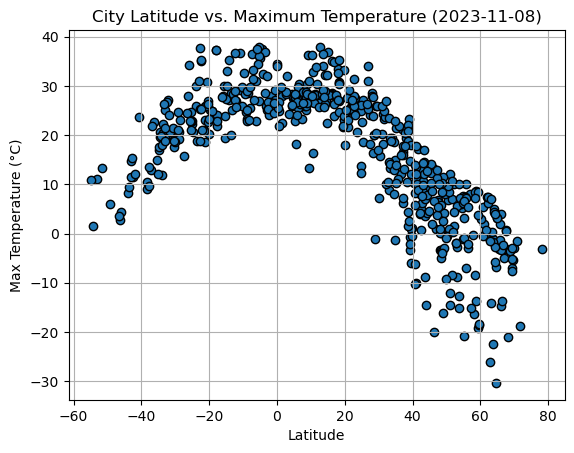

In [74]:

# Create a scatter plot for latitude vs. max temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Maximum Temperature (2023-11-08)')

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

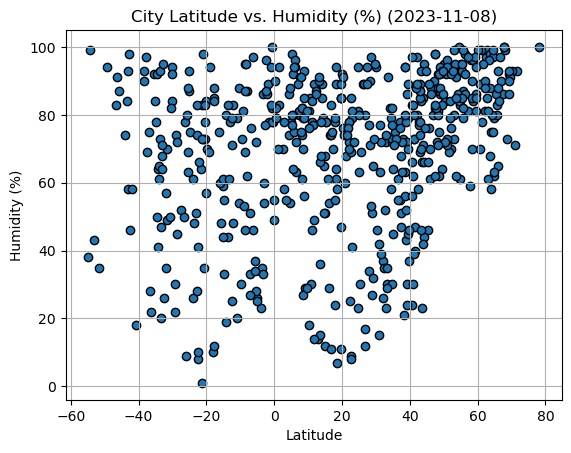

In [75]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (%) (2023-11-08)')

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

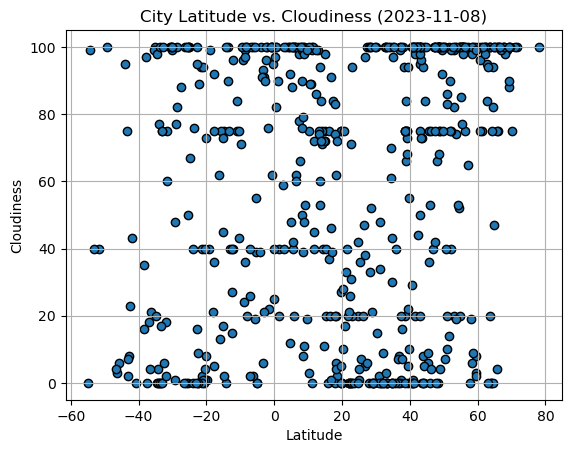

In [76]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors = 'black')


# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2023-11-08)')

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

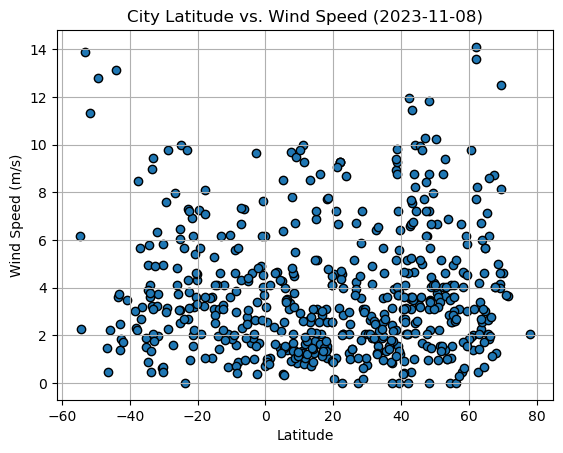

In [77]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors = 'black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2023-11-08)')

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [199]:
# Define a function to create Linear Regression plots
def linear_regression_plot(df, x_col, y_col):
    # Extract the x and y columns from the DataFrame
    x = df[x_col].values
    y = df[y_col].values
    
    # Perform linear regression using scipy's linregress
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    # Create the regression line
    line = slope * x + intercept
    
 
    
    # Plot the original data points
    plt.scatter(df[x_col], df[y_col],)
    
    # Plot the regression line
    plt.plot(x, line, color='red', linewidth=2,)
    equation = f'y = {slope:.2f}x + {intercept:.2f}'
    annotation_position = (np.mean(x), np.max(y))
    plt.annotate(equation, xy=annotation_position, xycoords='data', ha='center', fontsize=14, color='red')
    
    # Add labels and a legend
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    print(f"The r-value is: {r_value}")
   

    
    # Show the plot
    plt.show()

In [200]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,saipan,15.1355,145.7010,28.39,78,20,5.14,MP,1699543633
5,longquan,24.6719,102.1613,13.68,81,20,1.26,CN,1699543634
6,anadyr,64.7500,177.4833,-6.72,79,47,3.00,RU,1699543340
11,nova sintra,14.8667,-24.7167,22.53,68,98,6.88,CV,1699543376
12,tiksi,71.6872,128.8694,-18.84,93,100,3.63,RU,1699543222


In [201]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df =city_data_df[city_data_df['Lat'] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,viedma,-40.8135,-62.9967,23.77,18,0,3.47,AR,1699543633
1,port-aux-francais,-49.3500,70.2167,6.05,94,100,12.81,TF,1699543186
3,waitangi,-43.9535,-176.5597,8.29,74,95,13.14,NZ,1699543187
4,pundong,-7.9522,110.3486,25.54,87,100,0.86,ID,1699543634
7,west island,-12.1568,96.8225,26.99,83,40,4.12,CC,1699543232


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8434766594184447


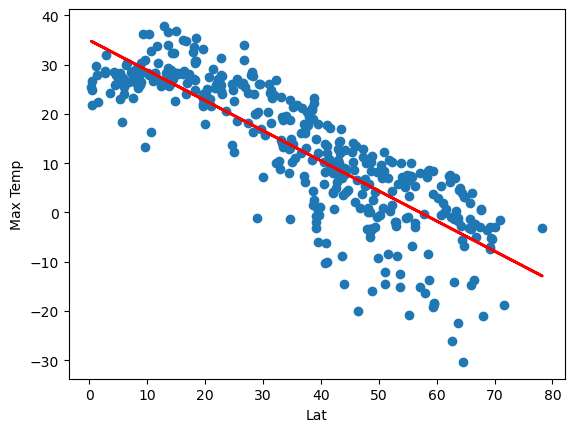

In [202]:
# Linear regression on Northern Hemispherelinear_regression_plot(northern_hemi_df, 'Lat', 'Max Temp')
linear_regression_plot(northern_hemi_df, 'Lat', 'Max Temp')

The r-value is: 0.7638694598936516


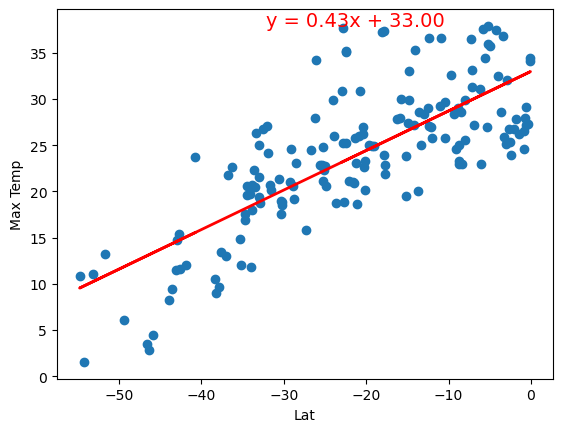

In [191]:
# Linear regression on Southern Hemisphere
linear_regression_plot(southern_hemi_df, 'Lat', 'Max Temp')

**Discussion about the linear relationship:** Based on two of these plots  in Northern Hemisphere temperatures tend to be higher at lower latitudes. In Southern Hemisphere temperature is higher as you move towards higher latitudes. We can see that higher tempreture are tend to be closer to the equator

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2902995183206317


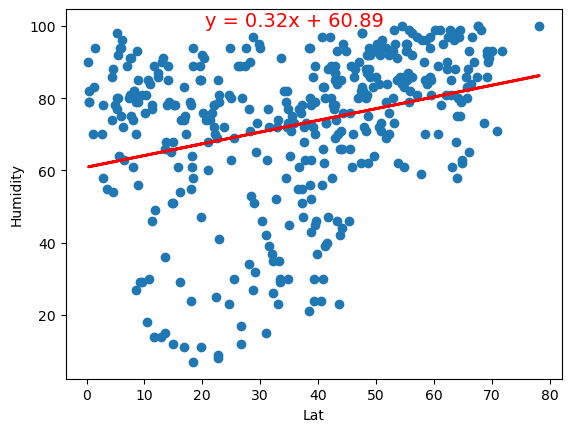

In [193]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df, 'Lat', 'Humidity')

The r-value is: -0.05361011542855676


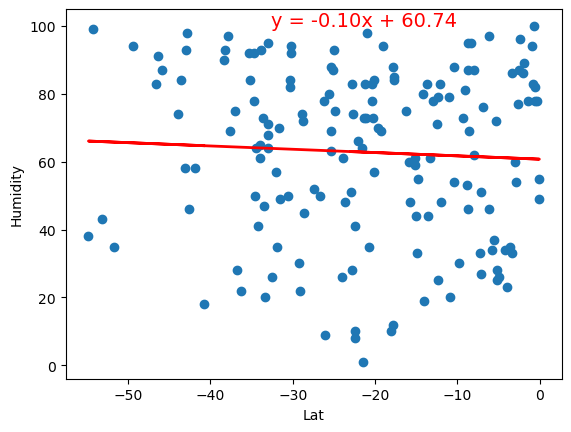

In [194]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df, 'Lat', 'Humidity')

**Discussion about the linear relationship:** In the Northern Hemisphere, humidity increases with latitude, while in the Southern Hemisphere, it slightly decreases as you move towards higher latitudes

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.17072089372022933


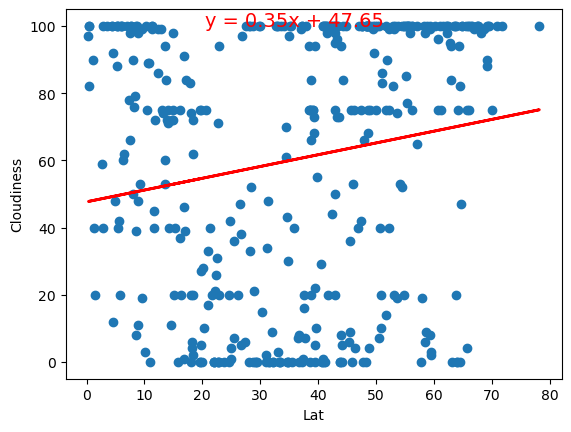

In [195]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df, 'Lat', 'Cloudiness')

The r-value is: 0.21859989751884396


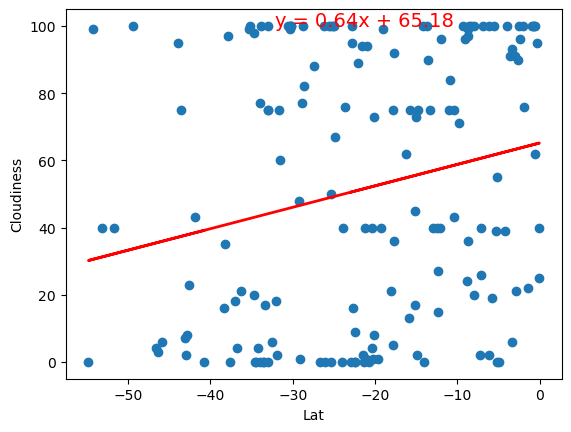

In [196]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df, 'Lat', 'Cloudiness')


**Discussion about the linear relationship:** Based on linear regression analysis in both plots, I observed a positive correlation between latitude and cloudiness level. The regression coefficients indicate that cloudiness tends to increase as latitude values move to higher numbers. However, it's essential to note that correlation does not imply causation, and other factors may contribute to cloudiness variations

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.15043015807800175


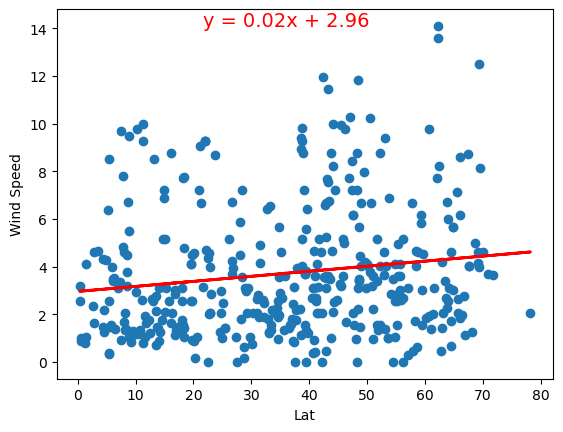

In [197]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df, 'Lat', 'Wind Speed')

The r-value is: -0.1631126285485117


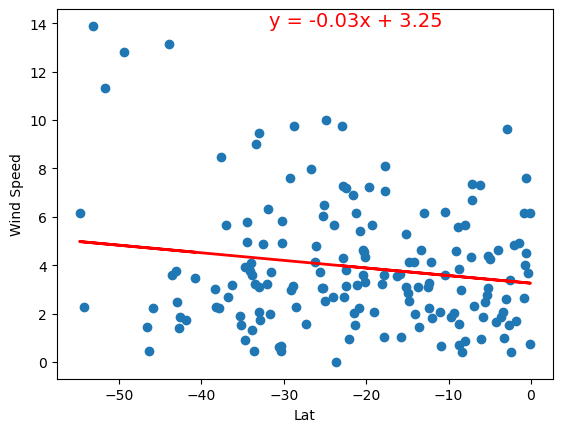

In [198]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df, 'Lat', 'Wind Speed')

**Discussion about the linear relationship:** Based on my plots I can see a positive coorrelation between latitude and wind speed. Wind speed tend to be lower closer to the equator, and increses when moves away from the equator